<a href="https://colab.research.google.com/github/caroheymes/tensorflow/blob/main/01_Manipulate_data_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulate data with tensorflow

In this exercise you will practice manipulating tensors and forming tensor datasets with tensorflow.
We are taking advantage of this moment to let you only manipulate data as we will be focusing much more on building models in the following days!

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/manipulate_data_with_tf')

In [5]:
import tensorflow as tf

## Practice tensor operations

* Create a constant tensor named `tensor1` containing the values `[0,1,2,3,4,5,6,7]` and a variable tensor named `tensor2` containing the values `[0,1,2,0,1,2]`

In [144]:
tensor1 = tf.constant([0,1,2,3,4,5,6,7])
tensor2 = tf.Variable([0,1,2,0,1,2])
print(tensor1,'\n', tensor2)

tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32) 
 <tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 0, 1, 2], dtype=int32)>


* Reshape `tensor1` so it has 2 columns and 4 rows, and `tensor2` so it has 2 rows and 3 columns.
Has this operation changed the nature of `tensor2`? How could you change it back to its former nature?

In [63]:
tensor1 = tf.reshape(tensor1, [4,2])

In [64]:
tensor1

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]], dtype=int32)>

In [145]:
tensor2 = tf.reshape(tensor2, [2,3])

In [147]:
tensor2 = tf.Variable(tensor2)

In [149]:
tensor2 = tensor2.assign_sub(tensor3)

In [150]:
tensor2

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[-1,  0,  1],
       [-1,  0,  1]], dtype=int32)>

* Use a tensorflow function to create `tensor3` with the same shape as `tensor2` but filled with 1

In [139]:
import numpy as np
tensor3 = tf.Variable(np.ones([2,3]).astype('int32'))
tensor3

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

* Modify the value of `tensor2` by substracting the values in `tensor3`, use a method so that it is an in place operation. Why would not you be able to do that with `tensor1`?

In [143]:
variable_tensor = tf.Variable([[1,2],[3,4]])
variable_tensor.assign_sub([[2,2],[2,2]])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [ 1,  2]], dtype=int32)>

* Can you multiply `tensor1` and `tensor2` pointwise? How about with a matrix multiplication? Display the result of the possible operations.

In [28]:
tensor1.shape

TensorShape([4, 2])

In [31]:
tensor2.shape

TensorShape([2, 3])

In [36]:
# Pointwise multiplication by a tensor of same shape
# print(tensor1 * tensor2)
# #impossable car shapes différentes
#Produit matriciel possible (broadcasting)
tf.matmul(tensor1, tensor2)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 0,  1,  2],
       [ 0,  5, 10],
       [ 0,  9, 18],
       [ 0, 13, 26]], dtype=int32)>

## Tabular data

This part of the exercise will let you deal with tabular data in order to make batch datasets ready to be fed to deep learning models.

* Using the `sklearn.datasets` module, load the mnist dataset thanks to the `load_digits` function.

* This function gives you a Data Bunch object, which works basically like a dictionnary. Create an object data containing the value of the `data` key and an object target containing the value of the `target` key.

In [94]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target

* What is the shape of `data` and `target`? Can you understand what these objects represent using the `DESCR` key of the Data Bunch?

In [93]:
data.shape

(1797, 64)

In [41]:
target.shape

(1797,)

In [44]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

data: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
target: [0 1 2 ... 8 9 8]


* Can you visualize the first image in data ?

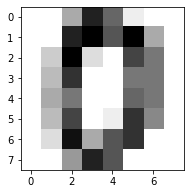

In [49]:
import matplotlib.pyplot as plt



# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)
plt.show()

* The pixel values from those images is encoded in integers between 0 and 255, it is always better to feed your deep learning models with reasonnably scaled data to avoid the network not being able to learn. To do this we'll divide the value in each pixel by 255. Do this.

In [169]:
data = data/255

In [170]:
from collections import Counter
Counter(target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

### Technique 1: Split the data with sklearn

Most of the time when you will be dealing with data you want to feed to a deap learning model, you will have a pandas DataFrame or numpy array at some points that contains some representation of your data and the associated values of the target variable. In those cases, it's easier to just split the data in a train and validation set using sklearn. (Remember that for very large datasets or for training and evaluating deep learning models we most of the time use the three way hold out method, where on set serves as the training set, one as the validation set to control for overfitting, and the last one is the test set against which we will evaluate the model).

* Split the data and target into three different parts, one containing the train set (60%), another with the validation set (20%), and a third with the test set (20%), using sklearn.

In [130]:
from sklearn.model_selection import train_test_split


# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.4)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5)



In [127]:
X_val.shape

(359, 64)

* Form three tensor slice datasets using the training validation and test data.

In [155]:
train = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
test = tf.data.Dataset.from_tensor_slices((X_test,Y_test))
val =  tf.data.Dataset.from_tensor_slices((X_val,Y_val))

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test = tf.data.Dataset.from_tensor_slices((X_test,y_test))
val = tf.data.Dataset.from_tensor_slices((x_val,y_val))

train: <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>
val: <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>
test: <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>


* Shuffle these tensor slice datasets and arrange them in batches of 8 observations, then display one batch from each of these batch datasets.

In [133]:
train_shuffle = train.shuffle(buffer_size=len(X_train)) 
test_shuffle = test.shuffle(buffer_size=len(X_test))
val_shuffle = val.shuffle(buffer_size=len(X_val))

In [134]:
train_batch = train_shuffle.batch(batch_size=8)
test_batch = test_shuffle.batch(batch_size=8)

# When extracting data from these objects we now get batches!
for x, y in train_batch.take(1): 
  print('x:',x)
  print('y:',y)


x: tf.Tensor(
[[ 0.  0.  0.  8. 14. 15.  7.  0.  0.  0.  4. 16. 12. 15. 14.  0.  0.  0.
   1.  1.  0. 11. 12.  0.  0.  0.  2.  4.  6. 14. 15.  0.  0.  4. 16. 16.
  16. 16.  5.  0.  0.  8. 12.  7. 14. 12.  0.  0.  0.  0.  0.  4. 16.  3.
   0.  0.  0.  0.  0. 11.  7.  0.  0.  0.]
 [ 0.  0.  9. 14. 16. 13.  2.  0.  0.  0. 13.  8.  2.  6.  4.  0.  0.  0.
  16.  2.  9.  8.  0.  0.  0.  3. 15. 15. 11. 14.  4.  0.  0.  5. 16.  6.
   0. 12.  2.  0.  0.  5.  7.  0.  3. 13.  0.  0.  0.  0.  5.  7. 13.  6.
   0.  0.  0.  0. 10. 16.  9.  0.  0.  0.]
 [ 0.  0.  8. 16. 16.  1.  0.  0.  0.  1. 12. 10. 16.  5.  0.  0.  0.  0.
   0.  3. 16.  6.  0.  0.  0.  0.  0.  6. 16.  2.  0.  0.  0.  4. 12. 14.
  16. 12.  5.  0.  0. 12. 16. 16. 14. 12.  5.  0.  0.  0.  6. 13.  0.  0.
   0.  0.  0.  0. 11.  8.  0.  0.  0.  0.]
 [ 0.  0. 11. 16. 16. 16. 16.  2.  0.  5. 16. 16. 14. 10.  4.  0.  0.  5.
  16.  5.  0.  0.  0.  0.  0.  1. 15. 10.  0.  0.  0.  0.  0.  0.  6. 16.
   8.  0.  0.  0.  0.  0.  0.  9. 14.  0.  

We are now ready to start training deep learning models!

## Technique 2: split using tensorflow

This technique is not so recommended because tensorflow is not able to work with datasets in the same way that sklearn does, it is not as practical to split the data in a random way, but we will show you how it can be done, as sometimes you will strictly be working with tensorflow objects.

* Create a tensor slice dataset object using `data`and `target`.

In [171]:
full_ds = tf.data.Dataset.from_tensor_slices((data,target))
print("full_ds:", full_ds)

full_ds: <TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)>


* Using the commands take and skip, separate the tensor slice dataset into a train object containing 60% of the data, a val object (20%) and a test object (20%).

In [172]:
n_train = int(0.6*len(data))
print('n_train : ', n_train)
n_val = int(0.2*len(data))
print('n_val : ', n_val)
n_test = len(data) - n_train - n_val
print('n_test : ', n_test)

train = full_ds.take(n_train)
print('train : ', train, len(train))
reste = full_ds.skip(n_train)
val = reste.take(n_val)
print('val : ', val, len(val))
test = reste.take(n_test)
print('test : ', test, len(test))


n_train :  1078
n_val :  359
n_test :  360
train :  <TakeDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)> 1078
val :  <TakeDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)> 359
test :  <TakeDataset shapes: ((64,), ()), types: (tf.float64, tf.int64)> 360


* Use methods shuffle and batch in order to create batch datasets with batches of 8 observations for train, val, and test, and show one batch from each of these objects.

In [173]:
train_batch = train.shuffle(n_train).batch(8)
val_batch = val.shuffle(n_val).batch(8)
test_batch = test.shuffle(n_test).batch(8)

print("train batch:", next(iter(train_batch)))
print("val batch:", next(iter(val_batch)))
print("test batch:", next(iter(test_batch)))

train batch: (<tf.Tensor: shape=(8, 64), dtype=float64, numpy=
array([[0.        , 0.00784314, 0.0627451 , 0.04705882, 0.04705882,
        0.05490196, 0.02745098, 0.        , 0.        , 0.01176471,
        0.0627451 , 0.03529412, 0.03137255, 0.03137255, 0.01568627,
        0.        , 0.        , 0.00784314, 0.0627451 , 0.03921569,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.01568627, 0.0627451 , 0.05098039, 0.0627451 , 0.01568627,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.04705882, 0.03921569, 0.        , 0.        ,
        0.        , 0.02352941, 0.01176471, 0.        , 0.03529412,
        0.04313725, 0.        , 0.        , 0.        , 0.04313725,
        0.04313725, 0.03529412, 0.0627451 , 0.01176471, 0.        ,
        0.        , 0.        , 0.01176471, 0.04705882, 0.05882353,
        0.02745098, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00392157, 0.04313725, 0.062745

Congratulations, you know two different ways of forming datasets that are fit for training deep learning models with tensorflow! This skill will come in very handy as we will try to focus more on building models from now on, and put less focus on preprocessing.
Until then, happy learning!